In [59]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from datetime import timedelta

In [60]:
start_date = dt.date(2020, 2, 24)
pre_start_date = dt.date(2020, 1, 24)
ddt = -((pre_start_date - start_date).days)
ddt

31

/home/atemerev/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,21,22,29,31,32,33,34,35,43,46,47,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:title={'center':'Daily new hospitalizations (Geneva)'}>

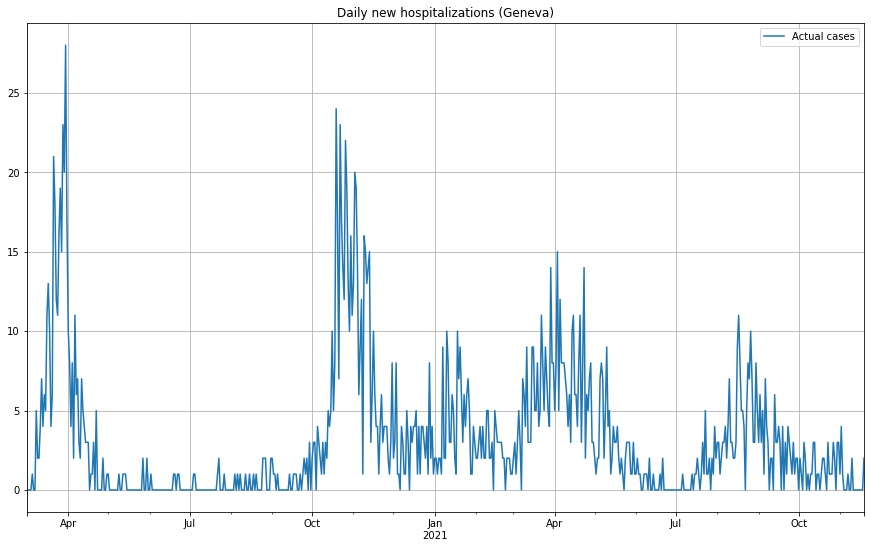

In [61]:
data_file = '/data/medical/covid/2021-11-24/ch.csv'
cases = pd.read_csv(data_file, sep=';', index_col=False, encoding='cp1252', parse_dates=[0,1])
cases
all_cases = cases
cases_hosp = cases
#cases_hosp = all_cases.query('hospitalisation == 1')
cases_hosp = all_cases.query('hospitalisation == 1 and ktn == "GE"')
cases = cases_hosp
cases_count = pd.DataFrame(cases.groupby('fall_dt')['eingang_dt'].count())
cases_count.columns = ['Actual cases']
cases_count = cases_count.rename_axis('Date')
period = pd.date_range(cases_count.index[0], cases_count.index[-1])
cases_count = cases_count.reindex(period, fill_value=0)[:-1]
cases_count = cases_count.cumsum()
cases = cases_count
cases.diff().plot(grid = True, figsize = (15, 9), title = 'Daily new hospitalizations (Geneva)')

In [62]:
all_cases['hospitalisation'].value_counts()
#all_cases.shape

2.0    77956
1.0    35829
3.0      746
Name: hospitalisation, dtype: int64

In [63]:
cases_by_age = pd.DataFrame()
for i in range(0, 16):
    age_low = i * 5
    age_hi = age_low + 5 if i < 15 else 999
    cases_group = cases_hosp.query('altersjahr >= @age_low and altersjahr < @age_hi')
    cases_count = pd.DataFrame(cases_group.groupby('fall_dt')['eingang_dt'].count())
    cases_count.columns = ['Actual cases']
    cases_count = cases_count.rename_axis('Date')
    period = pd.date_range(cases.index[0], cases.index[-1])
    cases_count = cases_count.reindex(period, fill_value=0)[:-1]
    cases_count = cases_count.cumsum()
    column = 'i{}'.format(i)
    cases_by_age[column] = cases_count.squeeze()
cases_by_age

i0  i1  i2  i3  i4  i5  i6  i7  i8  i9  i10  i11  i12  i13  i14  \
2020-03-01   0   0   0   0   0   0   1   0   0   0    0    0    0    0    0   
2020-03-02   0   0   0   0   0   0   1   0   0   0    0    0    0    0    0   
2020-03-03   0   0   0   0   0   0   1   0   0   0    0    0    0    0    0   
2020-03-04   0   0   0   0   0   0   1   0   0   0    0    0    0    0    0   
2020-03-05   0   0   0   0   0   0   1   0   0   0    1    0    0    0    0   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
2021-11-14   5   3   5  10  21  34  41  56  74  77  126  139  135  123  138   
2021-11-15   5   3   5  10  21  34  41  56  74  77  126  139  135  123  138   
2021-11-16   5   3   5  10  21  34  41  56  74  77  126  139  135  123  138   
2021-11-17   5   3   5  10  21  34  41  56  74  77  126  139  135  123  138   
2021-11-18   5   3   5  10  21  34  41  56  74  77  126  139  135  123  138   

             i15  
2020-03-01     0  
2020-03-02     0  
2020-03-03     0  
2020-03-04     0  
2020-03-05     0  
...          ...  
2021-11-14  1050  
2021-11-15  1050  
2021-11-16  1050  
2021-11-17  1050  
2021-11-18  1050  

[628 rows x 16 columns]

In [64]:
cases_by_age.tail(7).diff()

i0   i1   i2   i3   i4   i5   i6   i7   i8   i9  i10  i11  i12  \
2021-11-12  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2021-11-13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2021-11-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            i13  i14  i15  
2021-11-12  NaN  NaN  NaN  
2021-11-13  0.0  0.0  0.0  
2021-11-14  0.0  0.0  0.0  
2021-11-15  0.0  0.0  0.0  
2021-11-16  0.0  0.0  0.0  
2021-11-17  0.0  0.0  0.0  
2021-11-18  0.0  0.0  0.0

In [65]:
all_cases_by_age = pd.DataFrame()
for i in range(0, 16):
    age_low = i * 5
    age_hi = age_low + 5 if i < 15 else 999
    cases_group = all_cases.query('altersjahr >= @age_low and altersjahr < @age_hi')
    cases_count = pd.DataFrame(cases_group.groupby('fall_dt')['eingang_dt'].count())
    cases_count.columns = ['Actual cases']
    cases_count = cases_count.rename_axis('Date')
    period = pd.date_range(cases.index[0], cases.index[-1])
    cases_count = cases_count.reindex(period, fill_value=0)[:-1]
    cases_count = cases_count.cumsum()
    column = 'i{}'.format(i)
    all_cases_by_age[column] = cases_count.squeeze()
all_cases_by_age

i0     i1     i2     i3     i4     i5     i6     i7     i8  \
2020-03-01     0      0      0      0      1      1      2      1      0   
2020-03-02     0      0      0      2      6      6      5      3      3   
2020-03-03     0      0      1      4      7      9      8      6      3   
2020-03-04     1      0      1      5     10     10     13     14      6   
2020-03-05     1      1      2      5     11     12     21     18      9   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-11-14  8570  26335  47561  64915  78116  83495  81787  75505  73026   
2021-11-15  8661  26868  48305  65306  78451  83897  82212  75998  73574   
2021-11-16  8760  27446  49090  65688  78749  84244  82608  76441  74047   
2021-11-17  8870  28229  49959  66063  79086  84657  83040  76932  74555   
2021-11-18  8967  28897  50752  66424  79422  85051  83485  77463  75083   

               i9    i10    i11    i12    i13    i14    i15  
2020-03-01      1      2      0      2      0      0      1  
2020-03-02      2      4      2      4      0      1      4  
2020-03-03      9      6      4      5      4      1      8  
2020-03-04     14     10     15     11      8      1     17  
2020-03-05     21     20     24     18      9      2     23  
...           ...    ...    ...    ...    ...    ...    ...  
2021-11-14  71242  71814  65439  45893  29180  24626  70209  
2021-11-15  71700  72216  65838  46144  29372  24779  70574  
2021-11-16  72085  72620  66109  46383  29521  24906  70866  
2021-11-17  72510  72975  66420  46600  29681  25066  71144  
2021-11-18  72934  73353  66776  46823  29826  25220  71405  

[628 rows x 16 columns]

# Simulation starts here

In [66]:
df = pd.DataFrame()
#for r in range(1, 11):
#tally_file = '/data/medical/simulations/milan8/r1/1/tally.csv'
tally_file = './tally.csv'
t = pd.read_csv(tally_file)
for i in range(0, 16):
    column = 'i{}'.format(i)
    _cases = t['h{}'.format(i * 5)]
    df[column] = _cases

<AxesSubplot:>

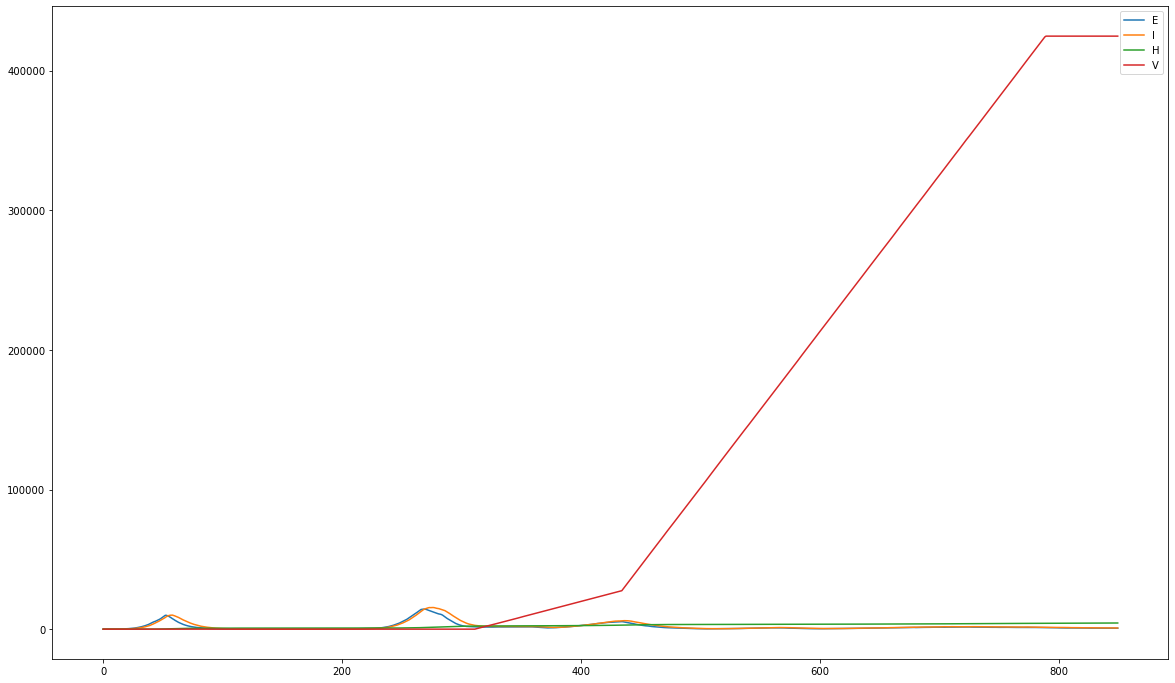

In [67]:
ddf = pd.read_csv('./tally.csv')
ddf[['E', 'I', 'H', 'V']].plot(figsize=(20, 12))

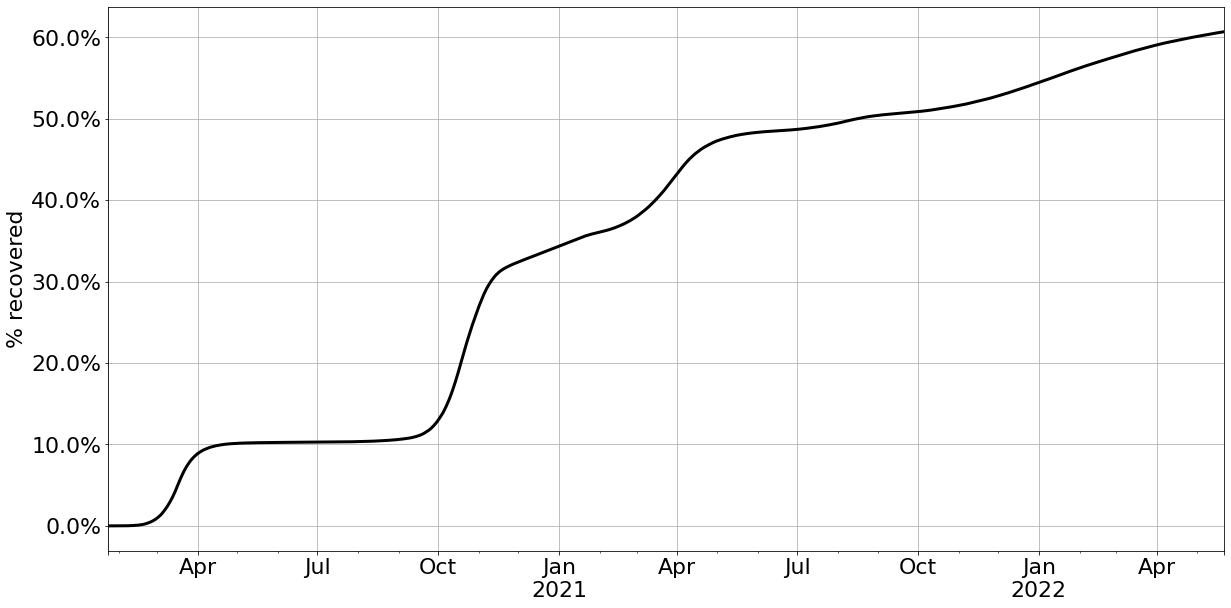

In [68]:
plt.rcParams.update({'font.size': 22})
tt = (((t['R'] + t['I']) / t['S'][0]) * 100)
tt.index = tt.index.map(lambda i: pre_start_date + dt.timedelta(days = i))
tt.index = pd.to_datetime(tt.index)
ax = tt.plot(figsize=(20, 10), color='black', lw=3, grid=True)
ax.set_ylabel('% recovered')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.savefig("/home/atemerev/Documents/sero.pdf")
plt.show()

In [69]:
plt.savefig("/home/atemerev/Documents/sero.pdf")

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

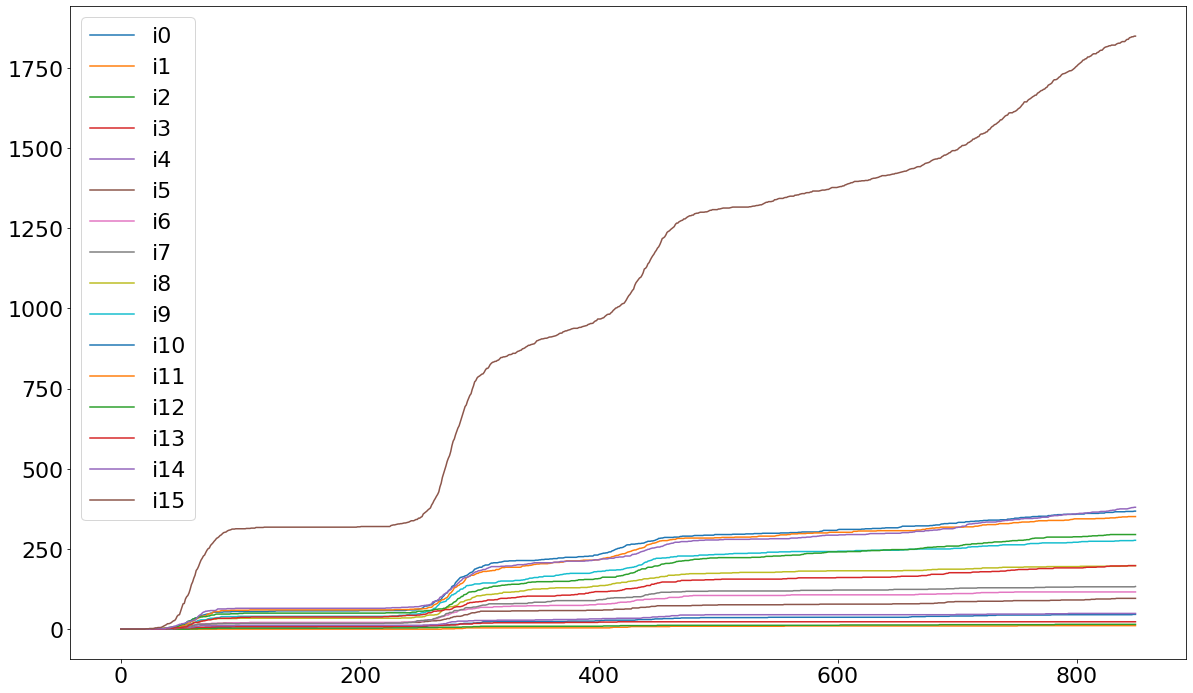

In [70]:
df.plot(figsize=(20,12))

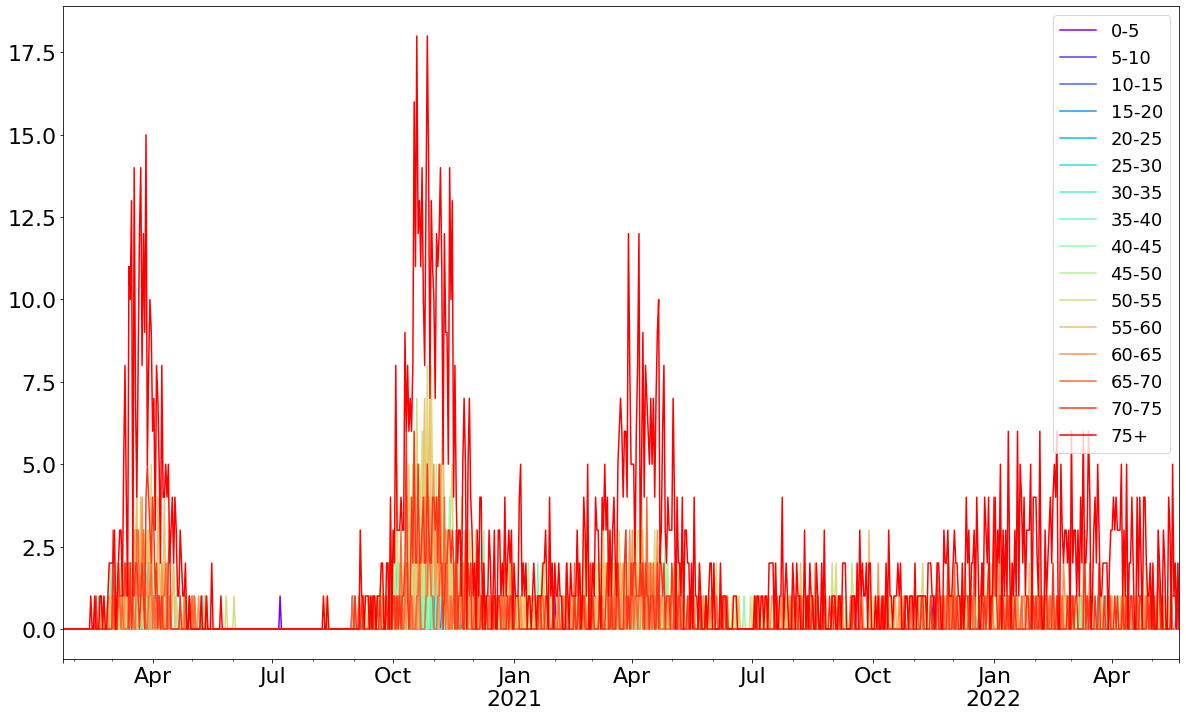

In [71]:
cdf = df.diff()
cdf.index = cdf.index.map(lambda i: pre_start_date + dt.timedelta(days = i))
cdf.index = pd.to_datetime(cdf.index)
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 16)]
plt.rcParams.update({'font.size': 22})
ax=cdf.plot(figsize=(20,12), legend=True, color=colors)
plt.rcParams.update({'font.size': 18})
ax.legend(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'])
plt.savefig('/home/atemerev/Documents/path.svg')
plt.show()

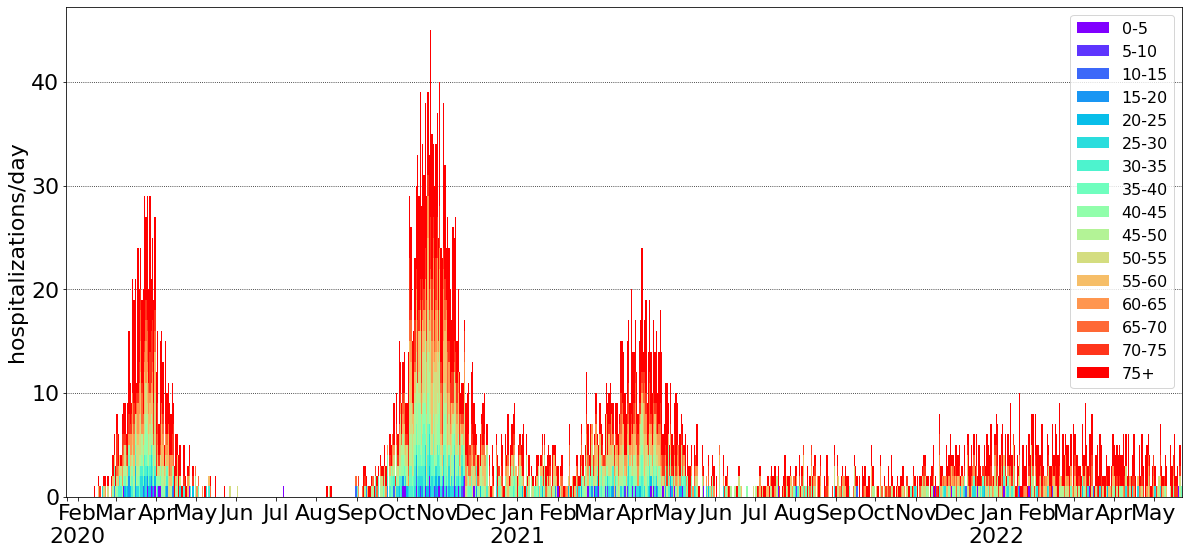

In [72]:
plt.rcParams.update({'font.size': 22})
ticks  = []
labels = []
first_month = True
tdf = cdf
for i, ts in enumerate(tdf.index):
    if i == 0:
        ticks.append(i)
        labels.append("")
    elif ts.year != tdf.index[i - 1].year:
        ticks.append(i)
        labels.append(ts.strftime("%b\n%Y"))
    elif ts.month != tdf.index[i - 1].month:
        ticks.append(i)
        if first_month:
            labels.append(ts.strftime("%b\n%Y"))
            first_month = False
        else:    
            labels.append(ts.strftime("%b"))
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 16)]

ax = tdf.plot.bar(stacked = True, figsize=(20, 10), color = colors, legend = False, grid = False, width=1.0)
#leg = plt.legend(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'])
ax.xaxis_date()
ax.set_axisbelow(True)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.set_ylabel("hospitalizations/day")
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='black', linestyle='dotted')
ax.figure.autofmt_xdate(rotation=0, ha='center')
plt.rcParams.update({'font.size': 16})
ax.legend(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'])
plt.savefig("/home/atemerev/Documents/sim-ages.pdf", bbox_inches='tight')
plt.show()

<AxesSubplot:>

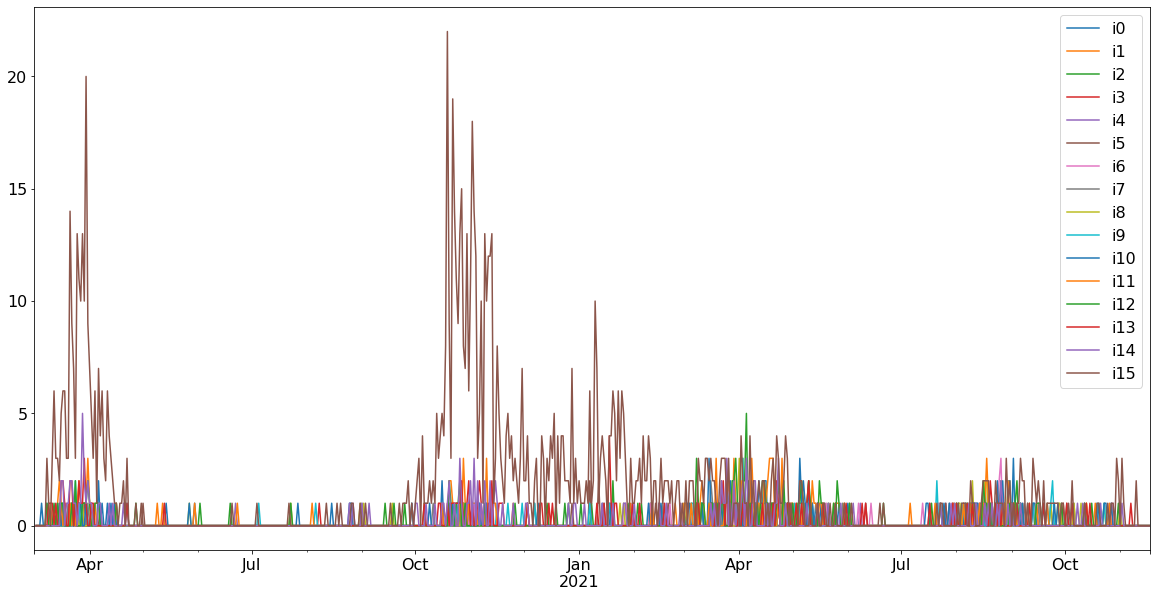

In [73]:
cases_by_age.diff().plot(figsize=(20, 10))

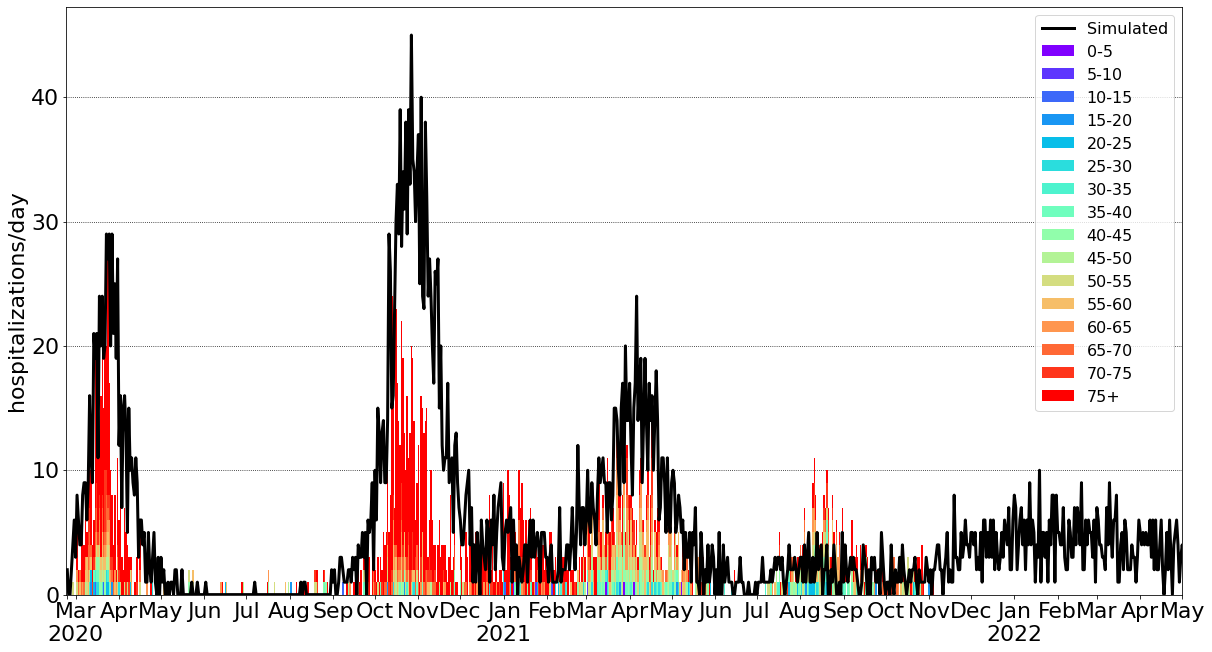

In [74]:
plt.rcParams.update({'font.size': 22})

ticks  = []
labels = []
first_month = True
for i, ts in enumerate(cdf[ddt:].index):
    if i == 0:
        ticks.append(i)
        labels.append("")
    elif ts.year != cdf[ddt:].index[i - 1].year:
        ticks.append(i)
        labels.append(ts.strftime("%b\n%Y"))
    elif ts.month != cdf[ddt:].index[i - 1].month:
        ticks.append(i)
        if first_month:
            labels.append(ts.strftime("%b\n%Y"))
            first_month = False
        else:    
            labels.append(ts.strftime("%b"))
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 16)]

ax1 = cases_by_age.diff().reset_index().iloc[:,1:].plot(kind='bar', stacked=True, figsize=(20, 12), color = colors, alpha=1, legend=False, grid=False, width=1.0)
cut = cases_by_age.shape[0]
ax = (cdf[ddt:]).sum(axis=1).reset_index().iloc[:,1:].plot(ax=ax1, color='black', lw=3)
ax.xaxis_date()
ax.set_axisbelow(True)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='black', linestyle='dotted')
ax.figure.autofmt_xdate(rotation=0, ha='center')
plt.rcParams.update({'font.size': 16})
ax.legend(['Simulated', '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'], loc='upper right')
ax.set_ylabel('hospitalizations/day')
#ax.legend(leg)
plt.savefig("/home/atemerev/Documents/sim-compare.pdf", bbox_inches='tight')
plt.show()
